# Example of Extremal DAG and Distance Computations

### Upload and import necessary files and packages

In [1]:
# upload and import necessary packages and files
from min_interval_posets.curve import Curve
from min_interval_posets.extremal_DAG import get_extremalDAG
from min_interval_posets import supergraph as sg
import numpy as np
import math
import matplotlib.pyplot as plt

### Generate Time Series 1

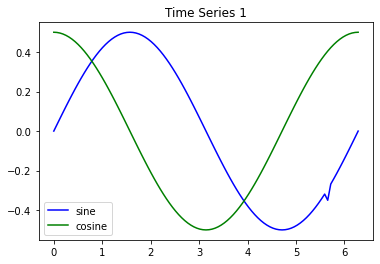

In [2]:
# compute sine and cosine curve
x = [i*(2*math.pi/100) for i in range(101)]
sine = [math.sin(i) for i in x]
sine[90] = -.7
cosine = [math.cos(i) for i in x]
c1 = Curve(Curve({float(x[i]):sine[i] for i in range(len(x))}).normalize())
c2 = Curve(Curve({float(x[i]):cosine[i] for i in range(len(x))}).normalize())
norm_sine = [sine[i]/2 for i in range(len(sine))]
norm_cosine = [cosine[i]/2 for i in range(len(cosine))]
plt.plot(x, norm_sine, 'b', label = 'sine')
plt.plot(x, norm_cosine, 'g', label = 'cosine',)
plt.legend(('sine', 'cosine'),loc='lower left')
plt.savefig("time-series-1.png")
plt.title('Time Series 1');

### Compute extremal DAG for time series 1

In [3]:
# compute extremal DAG
curves = {"sine":c1, "cosine":c2}
DAG1 = get_extremalDAG(curves)
DAG1

([('sine', 'min'),
  ('sine', 'max'),
  ('sine', 'min'),
  ('sine', 'max'),
  ('sine', 'min'),
  ('sine', 'max'),
  ('cosine', 'max'),
  ('cosine', 'min'),
  ('cosine', 'max')],
 [(0, 0.25),
  (1, 0.5),
  (2, 0.5),
  (3, 0.01564400256282758),
  (4, 0.01564400256282758),
  (5, 0.25000000000000017),
  (6, 0.5),
  (7, 0.5),
  (8, 0.5)],
 [((0, 1), 0.25),
  ((0, 2), 0.25),
  ((0, 3), 0.01564400256282758),
  ((0, 4), 0.01564400256282758),
  ((0, 5), 0.25),
  ((0, 7), 0.2495066821070679),
  ((0, 8), 0.25),
  ((1, 2), 0.5),
  ((1, 3), 0.01564400256282758),
  ((1, 4), 0.01564400256282758),
  ((1, 5), 0.25000000000000017),
  ((1, 7), 0.06775784314464708),
  ((1, 8), 0.4211367764821722),
  ((2, 3), 0.01564400256282758),
  ((2, 4), 0.01564400256282758),
  ((2, 5), 0.25000000000000017),
  ((2, 8), 0.06775784314464706),
  ((3, 4), 0.01564400256282758),
  ((3, 5), 0.01564400256282758),
  ((3, 8), 0.01564400256282758),
  ((4, 5), 0.01564400256282758),
  ((4, 8), 0.01564400256282758),
  ((6, 1), 0.067

### Generate time series 2

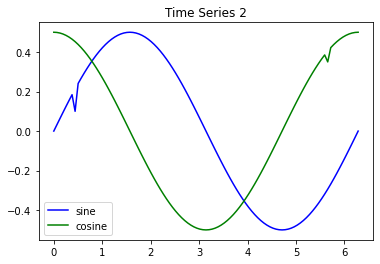

In [4]:
# Add noise to sine and cosine curves 
sine = [math.sin(i) for i in x]
sine[7] = .2
cosine[90] = .7
norm_sine = [sine[i]/2 for i in range(len(sine))]
norm_cosine = [cosine[i]/2 for i in range(len(cosine))]
c1 = Curve(Curve({float(x[i]):sine[i] for i in range(len(x))}).normalize())
c2 = Curve(Curve({float(x[i]):cosine[i] for i in range(len(x))}).normalize())
plt.plot(x, norm_sine, 'b', label = 'sine')
plt.plot(x, norm_cosine, 'g', label = 'cosine',)
plt.legend(('sine', 'cosine'),loc='lower left')
plt.savefig("time-series-2.png")
plt.title('Time Series 2');

### Compute extremal DAG for time series 2

In [5]:
curves = {"sine":c1, "cosine":c2}
DAG2 = get_extremalDAG(curves)
DAG2

([('sine', 'min'),
  ('sine', 'max'),
  ('sine', 'min'),
  ('sine', 'max'),
  ('sine', 'min'),
  ('sine', 'max'),
  ('cosine', 'max'),
  ('cosine', 'min'),
  ('cosine', 'max'),
  ('cosine', 'min'),
  ('cosine', 'max')],
 [(0, 0.25),
  (1, 0.04203113817116949),
  (2, 0.04203113817116949),
  (3, 0.5),
  (4, 0.5),
  (5, 0.25000000000000017),
  (6, 0.5),
  (7, 0.5),
  (8, 0.01762831069394738),
  (9, 0.01762831069394738),
  (10, 0.5)],
 [((0, 1), 0.04203113817116949),
  ((0, 2), 0.04203113817116949),
  ((0, 3), 0.25),
  ((0, 4), 0.25),
  ((0, 5), 0.25),
  ((0, 7), 0.2495066821070679),
  ((0, 8), 0.01762831069394738),
  ((0, 9), 0.01762831069394738),
  ((0, 10), 0.25),
  ((1, 2), 0.04203113817116949),
  ((1, 3), 0.04203113817116949),
  ((1, 4), 0.04203113817116949),
  ((1, 5), 0.04203113817116949),
  ((1, 7), 0.04203113817116949),
  ((1, 8), 0.01762831069394738),
  ((1, 9), 0.01762831069394738),
  ((1, 10), 0.04203113817116949),
  ((2, 3), 0.04203113817116949),
  ((2, 4), 0.04203113817116949

### Compute alignment matrix for sine curves

In [6]:
# compute alignment matrix for sine curves
sine_nodes1 = sg.get_node_strings(["sine", "cosine"], DAG1)[1][0]
sine_nodes2 = sg.get_node_strings(["sine", "cosine"], DAG2)[1][0]
mat = sg.get_alignmentmat(sine_nodes1, sine_nodes2)
mat

[[0,
  0.25,
  0.2920311381711695,
  0.334062276342339,
  0.834062276342339,
  1.334062276342339,
  1.5840622763423393],
 [0.25,
  0.0,
  0.04203113817116949,
  0.08406227634233898,
  0.584062276342339,
  1.084062276342339,
  1.3340622763423393],
 [0.75,
  0.5,
  0.4579688618288305,
  0.5,
  0.08406227634233898,
  0.584062276342339,
  0.8340622763423391],
 [1.25,
  1.0,
  0.9579688618288305,
  0.915937723657661,
  0.584062276342339,
  0.08406227634233898,
  0.33406227634233915],
 [1.2656440025628275,
  1.0156440025628275,
  0.9736128643916581,
  0.9315817262204886,
  0.5997062789051666,
  0.09970627890516656,
  0.3184182737795116],
 [1.281288005125655,
  1.031288005125655,
  0.9892568669544857,
  0.9472257287833162,
  0.6153502814679942,
  0.11535028146799414,
  0.3340622763423392],
 [1.5312880051256552,
  1.2812880051256552,
  1.2392568669544857,
  1.1972257287833163,
  0.8653502814679943,
  0.3653502814679943,
  0.11535028146799414]]

### Compute optimal alignment for nodes in sine curves

In [7]:
alignment = sg.get_bestalignment_index(sine_nodes1, sine_nodes2)[0]
alignment

[('min', (0.25, 0.25)),
 ('max', (0, 0.04203113817116949)),
 ('min', (0, 0.04203113817116949)),
 ('max', (0.5, 0.5)),
 ('min', (0.5, 0.5)),
 ('max', (0.01564400256282758, 0)),
 ('min', (0.01564400256282758, 0)),
 ('max', (0.25000000000000017, 0.25000000000000017))]

### Compute alignment matrix for cosine curves

In [9]:
# compute alignment matrix for cosine curves
cosine_nodes1 = sg.get_node_strings(["sine", "cosine"], DAG1)[1][1]
cosine_nodes2 = sg.get_node_strings(["sine", "cosine"], DAG2)[1][1]
mat = sg.get_alignmentmat(cosine_nodes1, cosine_nodes2)
mat

[[0, 0.5, 1.0, 1.0176283106939474, 1.0352566213878949, 1.5352566213878949],
 [0.5, 0.0, 0.5, 0.5176283106939474, 0.5352566213878949, 1.0352566213878949],
 [1.0, 0.5, 0.0, 0.01762831069394738, 0.03525662138789476, 0.5352566213878948],
 [1.5, 1.0, 0.5, 0.4823716893060526, 0.5, 0.03525662138789476]]

### Compute optimal alignment for nodes in cosine curve

In [11]:
alignment = sg.get_bestalignment_index(cosine_nodes1, cosine_nodes2)[0]
alignment

[('max', (0.5, 0.5)),
 ('min', (0.5, 0.5)),
 ('max', (0, 0.01762831069394738)),
 ('min', (0, 0.01762831069394738)),
 ('max', (0.5, 0.5))]

### Compute supergraph for DAG1 and DAG2

In [12]:
supergraph = sg.get_supergraph(["sine","cosine"], DAG1, DAG2)
supergraph

([(('sine', 'min'), (0.25, 0.25)),
  (('sine', 'max'), (0, 0.04203113817116949)),
  (('sine', 'min'), (0, 0.04203113817116949)),
  (('sine', 'max'), (0.5, 0.5)),
  (('sine', 'min'), (0.5, 0.5)),
  (('sine', 'max'), (0.01564400256282758, 0)),
  (('sine', 'min'), (0.01564400256282758, 0)),
  (('sine', 'max'), (0.25000000000000017, 0.25000000000000017)),
  (('cosine', 'max'), (0.5, 0.5)),
  (('cosine', 'min'), (0.5, 0.5)),
  (('cosine', 'max'), (0, 0.01762831069394738)),
  (('cosine', 'min'), (0, 0.01762831069394738)),
  (('cosine', 'max'), (0.5, 0.5))],
 [((0, 1), (0, 0.04203113817116949)),
  ((0, 2), (0, 0.04203113817116949)),
  ((0, 3), (0.25, 0.25)),
  ((0, 4), (0.25, 0.25)),
  ((0, 5), (0.01564400256282758, 0)),
  ((0, 6), (0.01564400256282758, 0)),
  ((0, 7), (0.25, 0.25)),
  ((0, 9), (0.2495066821070679, 0.2495066821070679)),
  ((0, 10), (0, 0.01762831069394738)),
  ((0, 11), (0, 0.01762831069394738)),
  ((0, 12), (0.25, 0.25)),
  ((1, 2), (0, 0.04203113817116949)),
  ((1, 3), (0, 